In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
import scipy

Rules:
- Open book, open notes, open google, open wolfram alpha. No chat no forum post.
- 8 Problem 100 each.
- Full score = 720.
- Comment your code. Write your code with good style.
- For problem 6, 7, 8 there is a +10 bonus for each problem on good coding style.

# 1) Easy Stuff

1.1) Use gaussian elimination to solve the following system of equations. You can do it by hands. No need to implement one. And no do not use np.linalg.solve(only use it for checking answer).

$$
\begin{bmatrix}
1 & -1 & 1 \\
2 & -1 & 3 \\
-1 & 3 & 4 \\
\end{bmatrix}
\begin{bmatrix}
x\\
y \\
z
\end{bmatrix}
=
\begin{bmatrix}
4 \\
17 \\
29
\end{bmatrix}
$$

In [3]:
A = np.array([[1,-1,1],
              [2,-1,3],
              [-1,3,4]
             ])
C = [4, 17,29]
ans = np.linalg.solve(A,C)

In [4]:
print(ans)

[ 3.  4.  5.]


1.2) Random number manipulation. 

Use **np.random.rand()** which generate uniform random real number from 0-1. To generate the following random number generator which generates

1.2.1) A uniform random real number from 63-90

In [13]:
np.random.rand(100)*27+63

array([ 67.4175291 ,  76.74464835,  85.22174489,  89.03230305,
        68.89667791,  84.79712852,  68.25252232,  64.72871211,
        77.1120191 ,  80.01800948,  81.74354518,  65.31883044,
        75.30525711,  89.28733802,  82.47935546,  87.46093375,
        87.77641812,  89.55943242,  75.23894221,  65.20636176,
        74.8503039 ,  83.41156068,  64.74868437,  81.02669509,
        78.74907652,  66.70328829,  84.66959509,  86.01869573,
        63.73197698,  85.79633588,  73.80882024,  63.89900984,
        84.39699169,  66.24250168,  64.78037358,  75.37972259,
        67.93819763,  66.81916645,  67.05762736,  66.59301739,
        66.9222929 ,  78.82971752,  72.42905898,  82.96478922,
        71.5715308 ,  75.72420437,  70.1213606 ,  77.04543654,
        66.15546669,  86.53036058,  79.90431043,  71.12886157,
        64.84219351,  83.53066268,  85.36125921,  88.94417898,
        79.15128078,  78.39700321,  64.31331945,  81.71160339,
        68.41987864,  85.78494741,  74.82836542,  85.68

1.2.2) A random ** integer ** which gives -1 40% of the time and  0 20% and 1 40% of the time.

In [264]:
def myran():
    p = np.random.random()
    if p <= 0.4:
        return -1
    if p <= 0.6:
        return 0
    else:
        return 1
    
def rannd():
    return np.random.choice([-1,-1,-1,-1,0,0,1,1,1,1])

In [266]:
myran()

-1

# 2) System of Non-linear Equations

Find **all solutions** to the following system of non linear equations using Newton's Method given that $x \in [-10,10]$ and $y \in [-10, 10]$
$$x^3 + y^3 = 9.8667 - xy$$
$$y^2  = 2x + 20$$

In [77]:
def u(x,y):
    return x**3+y**3 +x*y- 9.8667
def v(x,y):
    return y**2 -2*x -20

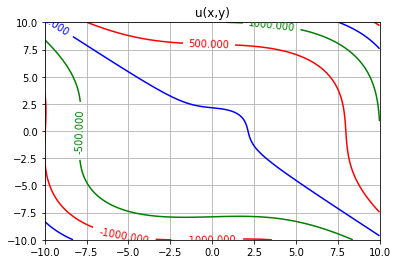

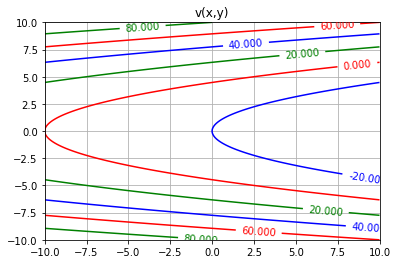

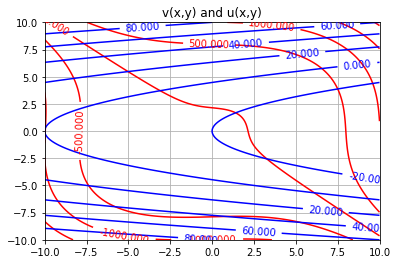

In [78]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 500
ny = 500
x = np.linspace(-10,10,nx)
y = np.linspace(-10,10,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)
 


ucs = plt.contour(x, y, uz, colors=('b','r','g'))
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('u(x,y)')

plt.figure()
vcs = plt.contour(x, y, vz, colors=('b','r','g'))
plt.clabel(vcs, inline=1, fontsize=10,)
plt.title('v(x,y)')
plt.grid()
plt.figure()

ucs = plt.contour(x, y, uz, colors=('r','r','r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b','b','b'))
plt.clabel(vcs, inline=1, fontsize=10,)
plt.title('v(x,y) and u(x,y)')

plt.grid()

In [79]:
#give me ALL solutions
def solve(x0,y0,u,v):
    x = x0
    y = y0
    h=1e-4
    i = 0
    while(True):
        
        du_x = (u(x+h,y) - u(x,y))/h
        du_y = (u(x,y+h) - u(x,y))/h
                
        dv_x = (v(x+h,y) - v(x,y))/h
        dv_y = (v(x,y+h) - v(x,y))/h
        
        C = [-u(x,y) + du_x * x + du_y *y,
             -v(x,y)+ dv_x * x + dv_y*y]
        
        A = [[du_x, du_y],
             [dv_x, dv_y]]
        
        x_r, y_r = np.linalg.solve(A,C)   
        
        if(np.abs(x_r - x)< 1e-5 and np.abs(y_r - y)< 1e-5):
            break;
        x = x_r
        y = y_r
    
    return x_r,y_r

In [84]:
x1,y1 = solve(-5,4,u,v)
x2,y2 = solve(5,-2.5,u,v)

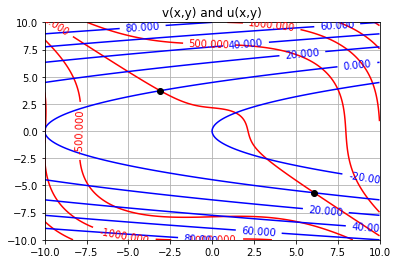

In [85]:
ucs = plt.contour(x, y, uz, colors=('r','r','r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b','b','b'))
plt.clabel(vcs, inline=1, fontsize=10,)
plt.title('v(x,y) and u(x,y)')

plt.plot(x1,y1,"ok")
plt.plot(x2,y2,"ok")
plt.grid()

# 3) Gradient Descent.

3.1) (70) Implement a gradient descent method to find the **minimum** location of the following function. Note that You ** must ** use analytic gradient.

$$f(x,y) = (x-1)^4 + (x-y)^4 + (y-2)^4 - 10 $$

In [65]:
def f(x,y):
    return (x-1)**4 + (x-y)**4 + (y-2)**4 -10

Text(0.5,1,'f(x,y)')

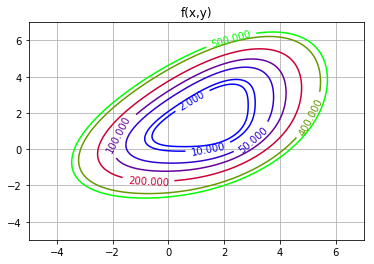

In [159]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
def f(x,y):
    return (x-1)**4 + (x-y)**4 + (y-2)**4 -10

nx = 200
ny = 200
x = np.linspace(-5,7,nx)
y = np.linspace(-5,7,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

In [182]:
def gref(f,v):
    h = 1e-4
    x,y = v
    df_x = (f(x+h,y)-f(x-h,y))/(h+h)
    df_y = (f(x,y+h)-f(x,y-h))/(h+h)
    return np.array([df_x,df_y])

def updateRule_2D(f, x0, y0, n, lmd): ## start = x0
    v = [x0, y0]
    for i in range(n):
        plt.plot(v[0], v[1],"or") 
        v = v - lmd*gref(f,v)

    return v[0],v[1]

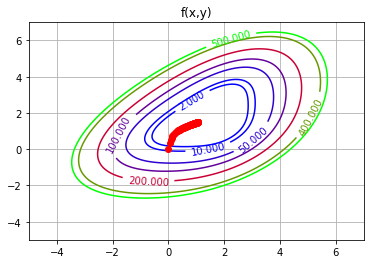

In [183]:
ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')
def f(x,y):
    return (x-1)**4 + (x-y)**4 + (y-2)**4 -10
x0 = 0
y0 = 0
n = 100
lmd = 0.01
ans = updateRule_2D(f, x0, y0, n, lmd)
# plt.xlim(-5,7)
# plt.ylim(-3,7)
plt.plot(ans[0], ans[1],"or")

3.2) (30) Answer the following questions.

3.2.1) Does Gradient Descent guarantee to converge to absolute minimum?


In [ ]:
#this method doesn't guarantee convergence as you have seen from the case where learning rate is large.

3.2.2) What is wrong with large learning rate($\lambda$)?


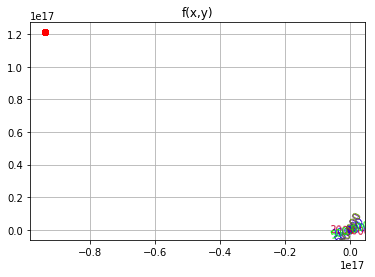

In [184]:
ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')
x0 = 0
y0 = 0
n = 100
lmd = 1
ans = updateRule_2D(f, x0, y0, n, lmd)
# plt.xlim(-5,7)
# plt.ylim(-3,7)
plt.plot(ans[0], ans[1],"or")

#we will be going to far

3.2.3) What is wrong with small learning rate($\lambda$)?

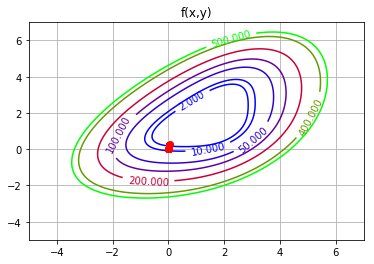

In [185]:
ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')
x0 = 0
y0 = 0
n = 100
lmd = 0.0001
ans = updateRule_2D(f, x0, y0, n, lmd)
# plt.xlim(-5,7)
# plt.ylim(-3,7)
plt.plot(ans[0], ans[1],"or")

# we are not going anywhere.

# 4) Linear Regression

Suppose that we want to fit the following data with the function
$$
f(x) = A \sin(x) + B x + C 
$$
for some value of $A$, $B$ and $C$

Find $A$, $B$ and $C$ that gives you the best fit.

In [141]:
def f(x,A,B,C):
    return (A*np.sin(x))+(B*x)+C

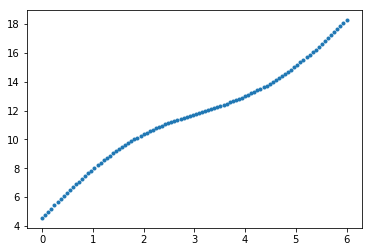

In [142]:
xs = xs = np.linspace(0,6,100)
ys = np.array([  4.56      ,   4.77631801,   4.99236246,   5.20786079,
         5.42254245,   5.63613989,   5.84838954,   6.05903277,
         6.26781686,   6.47449592,   6.67883177,   6.88059486,
         7.07956506,   7.27553253,   7.46829841,   7.65767565,
         7.84348959,   8.02557869,   8.20379507,   8.37800508,
         8.54808979,   8.71394539,   8.87548362,   9.03263207,
         9.18533445,   9.33355078,   9.47725759,   9.61644793,
         9.75113145,   9.88133434,  10.00709927,  10.12848518,
        10.24556709,  10.35843583,  10.46719772,  10.57197412,
        10.67290105,  10.77012868,  10.86382072,  10.9541539 ,
        11.04131728,  11.12551153,  11.20694826,  11.28584918,
        11.36244533,  11.4369762 ,  11.50968885,  11.58083706,
        11.65068031,  11.7194829 ,  11.78751294,  11.85504137,
        11.92234098,  11.98968541,  12.05734812,  12.12560141,
        12.1947154 ,  12.26495706,  12.33658922,  12.4098696 ,
        12.48504987,  12.56237473,  12.64208098,  12.7243967 ,
        12.80954039,  12.89772014,  12.98913293,  13.08396383,
        13.18238539,  13.28455695,  13.39062409,  13.5007181 ,
        13.61495545,  13.73343744,  13.85624974,  13.98346214,
        14.11512829,  14.25128545,  14.39195442,  14.53713941,
        14.68682806,  14.84099147,  14.99958431,  15.16254498,
        15.32979585,  15.50124353,  15.67677922,  15.85627912,
        16.03960485,  16.226604  ,  16.41711067,  16.61094608,
        16.80791921,  17.00782755,  17.21045779,  17.41558662,
        17.62298157,  17.83240185,  18.04359923,  18.25631894])
plt.plot(xs,ys,'.');

[-0.04254439] [ 2.18522852] [ 5.54378818]


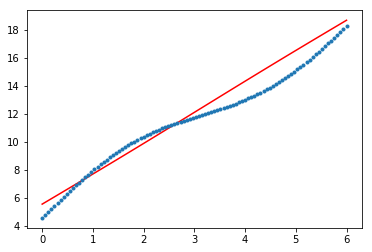

In [143]:
#first try
# mA = np.array([
#     [sum(xs**4),sum(xs**3),sum(xs**2)],
#     [sum(xs**3),sum(xs**2),sum(xs)],
#     [sum(xs**2),sum(xs),xs.shape[0]]
    
# ])
# mB = np.array([
#     [sum(ys*xs**2)],
#     [sum(ys*xs)],
#     [sum(ys)]
# ])
# b = np.linalg.solve(mA,mB)
# A,B,C = b
# space = np.linspace(-1,7,100)
# plt.plot(xs, [f(x,A,B,C) for x in xs], 'r')
# plt.plot(xs,ys,'.');
# print(A,B,C)

1.22999976932 2.33999990106 4.56000029473


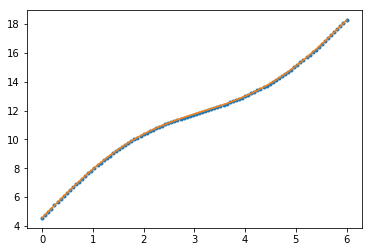

In [144]:
#Answer
from scipy import optimize as opti
def cost(pack):
    A,B,C = pack
    return sum(((A*np.sin(xs))+(B*xs)+C - ys)**2)
magic = opti.minimize(cost,[1,1.5,2])
A,B,C = magic.x
space = np.linspace(0,6,100)
plt.plot(xs,ys,'.')
plt.plot(space, [f(s,A,B,C) for s in space])
print(A,B,C)

# 5) Monte Carlo Integration

5.1) Evaluate the following integral using Monte Carlo method.

$$ \iiint \limits_C e^{-x^2 + 2y - z} \; dx \; dy \; dz$$

where $C$ is a sphere of radius 2 centered at $(1,2,3)$

In [137]:
from numpy.random import random, randint, randn
def f(r):
    x = np.random.random()*4 -1
    y = np.random.random()*4 
    z = np.random.random()*4 +1
    if ((x-1)**2 + (y-2)**2 + (z-3)**2)**0.5 >r: # if it is not in the sphere
        return 0
    return np.exp((-x**2)+(2*y)-z)

In [139]:
many_times = 1000000 # pick n  some pieces
n = many_times
v = 4*4*4 #volume of the thing want to intigrate still use a box
r = 2
sum([f(r) for i in range(n)]) * v/n

201.25281337053522

5.2) Evaluate the following integral

$$ \iint \limits_D \left(\sin(x)+\cos(y)\right)^2 \; dx \; dy$$

where $D$ the red area show in the picture below. It is the **union** of
- circle which centers at (-1.5, 0) with radius 2
- circle which centers at (1, 0) with readius 2

<img src="area.png"/>

In [337]:
def f_first(r):
    x = (np.random.rand()*4)-3.5
    y = (np.random.rand()*4)-2.
    
    if np.sqrt((x+1.5)**2 +(y**2)) >r :
        return 0
    return (np.sin(x) +np.cos(y))**2

def f_second(r):
    x = (np.random.rand()*4)-1.
    y = (np.random.rand()*4)-2.
    
    if np.sqrt((x-1)**2 +(y**2)) >r :
        return 0
    return (np.sin(x) +np.cos(y))**2

In [341]:
many_times = 100000 # pick n  some pieces
n = many_times
a = 16 #area
r = 2
first = sum([f_first(r) for i in range(n)]) * a/n
second = sum([f_second(r) for i in range(n)]) * a/n

print(first)
print(second)

5.08706667298
18.2945507254


In [349]:
def f(x,y):
    return (np.sin(x) +np.cos(y))**2
n = 100000
xl = (np.random.rand(n)*4)-3.5
yl = (np.random.rand(n)*4)-2.

xr = (np.random.rand(n)*4)-1.
yr = (np.random.rand(n)*4)-2.

mid = 0.
for i in range(n):
    #inside circle
    if (((xl[i]**2)+(yl[i]**2))<=(2.**2) and ((xr[i]**2)+(yr[i]**2))<=(2.**2)):
        if (xl[i]>=xr[i]):
            mid += f(xl[i],yl[i])

        if (xr[i]<=xl[i]):
          
            mid += f(xl[i],yl[i])
            
        elif (xl[i]<=1.):
            
            mid += f(xl[i],yl[i])
        elif (xr[i]<=1.):
            
            mid += f(xl[i],yl[i])


mid *= (4.**2)/n
print(mid)

2.19496421457


In [350]:
#answer 
ans = (first+second)-mid
print(ans)

21.1866531838


# 6) Minimization

11.1 Surround Speakers problem. Nowadays the sound system gets so fancy we even have 11.1 speakers. That's the total of 11 speakers + 1 subwoofer.

Given this many speakers one problem that becomes less trivial is the delay between speakers. We want to hear the sound from all the speaker at the same time. Since sound travel at constant speed in air, we will hear from the speaker that is **nearest** to us first and the **furthest** speaker last. If these **two distances** are **too different**, the listener would get confused.

Placing a speaker in a cicular manner would have solved this problem but that would ruins all the interior design. So we will fix where the speakers are but we will change where we sit instead.

So the goal for this problem is to figure out where we should sit so we can hear sound from all speaker **at the same time as much as possible**. In other words, the distance from all speakers should be as equal as possible.

Be sure to justify your cost functions.

This is a semi-openended problem. Anything sensible goes. Be careful about starting position.

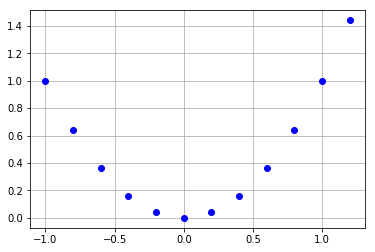

In [250]:
from scipy.optimize import minimize
# theta = np.linspace(0,6,12)
# xs = np.cos(theta) + np.linspace(0,2,12)
# ys = np.sin(theta) - np.linspace(0,2,12)
tmp = np.linspace(-1,1.2,12)
xs = tmp
ys = xs**2
plt.plot(xs, ys, 'ob')
plt.grid(True)

In [369]:
def dis(p1,p2):
    xPow2 = (p2[0]-p1[0])**2
    yPow2 = (p2[1]-p1[1])**2
    return np.sqrt(xPow2+yPow2)

def cost1(chairPos):
    karma = 0
    dis_one = dis(chairPos, (xs[0],ys[0]))
    for speaker in zip(xs,ys):
        karma+= abs(dis_one - dis(chairPos, speaker))
    return karma

def cost2(chairPos):
    alldis = [dis(chairPos, speaker) for speaker in zip(xs,ys)]
    mean = sum(alldis)/len(xs)
    karma = 0
    for i in range(len(alldis)):
        karma += abs(mean-alldis[i])
    return karma
    
       

[ -1.91895663e-09   1.06869571e+00]


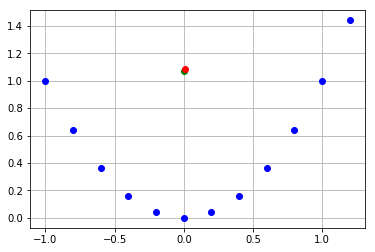

In [371]:
from scipy import optimize as opti

wtf = opti.minimize(cost1,[0,0.2])
best_chairPos1 = wtf.x

wtf = opti.minimize(cost2,[0,0.2])
best_chairPos2 = wtf.x

print(best_chairPos1)
plt.plot(xs, ys, 'ob')
plt.grid(True)
plt.plot(best_chairPos1[0],best_chairPos1[1], "og")
plt.plot(best_chairPos2[0],best_chairPos2[1], "or")

# 7) Monte Carlo Simulations.

Consider a dice game between two person.

 - Each person throw a dice two times.
 - If the results of the two dices are different. The score is calculated by the sum. Eg. $(5,6) \to 5+6 = 11$
 - If the results of the two dices are the same. The score is 5 times the sum of the two. Eg. $(1,1) \to 5 \times(1+1) = 10$
 
 You are presented with 2 dices.
  - A standard 6 sided fair dice. Faces are 1,2,3,4,5,6.
  - A fair dice 6 sided dice. Faces are 1,2,3,1,2,3. Hoping for higher chance of getting bonus.
  
Which dice has higher probability of winning?

In [295]:
def dice1():
    return np.random.choice([1,2,3,4,5,6])
def dice2():
    return np.random.choice([1,2,3,1,2,3])
def calscore(d):
    if(d[0] == d[1]):
        return 5*(d[0]+d[1])
    else:
        return d[0] + d[1]
    
def play():
    d1s = calscore([dice1(), dice1()])#play only dice1
    d2s = calscore([dice2(), dice2()])#play on;y dice2
    
    if d1s > d2s: #d1 win
        return 1
    elif d1s < d2s: # d2 win
        return 0
    else:
        return -1

In [296]:
#sim
n = 200000
d1w = 0
d2w = 0
for i in range(n):
    result = play()
    if result == 1:
        d1w+=1
    if result == 0:
        d2w+=1
    else: # draw
        continue

In [297]:
p_of_d1 = d1w/n
p_od_d2 = d2w/n

In [298]:
print(p_of_d1)
print(p_od_d2)

#dice 1 has higher chance of winning

0.624185
0.31046


# 8) <span style="color:#bc47bc">Couple</span><span style="color:#515489">Maker</span>

Gift saw Ply business going well. She wants to make money too. She decides to stop playing Widowmaker on Overwatch and build a startup matchmaking service called <span style="color:#bc47bc">Couple</span><span style="color:#515489">Maker</span>. 

Her clients consists of equal amount of male and female.

Everyone get to look at the profile of everyone of the opposite sex and put down the number on how much he/she is willing to pay if <span style="color:#bc47bc">Couple</span><span style="color:#515489">Maker</span> match he/she to that person.

To illustrate, let us consider if there are 4 person: M1, M2, F1 and F2. Where the prefix M indicates male and F indicates female.
 - M1 see the profile of F1 and F2 and decide to write down 5 Dollars for F1 and 10 Dollars for F2.
 - M2 see the profile of F1 and F2 and decide to write down 7 Dollars for F1 and 20 Dollars for F2.
 - F1 see the profile of M1 and M2 and decide to write down 12 Dollars for M1 and 2 Dollars for M2.
 - F2 see the profile of M1 and M2 and decide to write down 15 Dollars for M1 and 1 Dollar for M2.

Suppose that <span style="color:#bc47bc">Couple</span><span style="color:#515489">Maker</span> system match (M1 with F1) and (M2 with F2). Then the company will receive payment of

- 5 Dollars from M1
- 12 Dollars from F1
- 20 Dollars from M2
- 1 Dollar from F2

which gives the total of 38$.

## The Problem

Gift has 50 male clients and 50 female clients and she wants to **maximize** the revenue. The amount of money are willing to pay each depending whom they got matched with is given in matrix $rfm$(rating from male) and $rff$(rating from remale)

- ```rfm[m, f]``` is how much male $m$ would pay if he is matched with female $f$
- ```rff[f, m]``` is how much a female $f$ would pay if she is matched with male $m$

Use Hill climbing to help Gift maximize the revenue by finding out who should be match with whom.











In [289]:
# np.random.seed(100)
# rfm = np.random.randn(50,50)**2 *100
# rff = np.random.randn(50,50)**2 *50 + 50
# np.savetxt('rfm.txt', rfm)
# np.savetxt('rff.txt', rff)
rfm = np.loadtxt('rfm.txt')
rff = np.loadtxt('rff.txt')

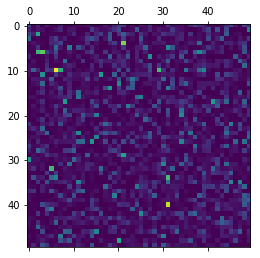

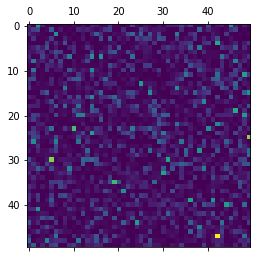

In [290]:
plt.matshow(rfm)
plt.matshow(rff)

In [291]:
def swape(intable):
    mtable = np.copy(intable)
    i = np.random.randint(50)
    j = np.random.randint(50)
    tmp = mtable[i]
    mtable[i] = mtable[j]
    mtable[j] = tmp
    return mtable
    
def calincome(mtable): #score
    money = 0
    for i in range(50):
        m = i
        fm = mtable[i]
        money+= rfm[m,fm] + rff[fm,m]
    return money    

In [292]:
b_mtable = [i for i in range(50)]# init matching table #index is male # value is femal
b_income = calincome(b_mtable)

for i in range(100000):
    tmp_mtable = swape(b_mtable)
    tmp_income = calincome(tmp_mtable)
    if(b_income < tmp_income):
        b_income = tmp_income
        b_mtable = np.copy(tmp_mtable)

In [293]:
print(b_mtable)
print(b_income)

[48 49  0 43 21  9  2 27 36 32  6 16 23 29 18 11 25 41 22 35 34 26 17  3 44
 15 46 37 10 13 33 30  5 39 31 45 24 12 19 14  4 42 47 38 40  1  8  7 20 28]
36814.2849285
